### Problem Statement- This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities.The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. Using this dataset, the participants need to build machine learning models for predicting the trip fare based on the given other useful features of the trip.

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=[20,8]

pd.set_option('display.max_columns',None)

In [22]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


train.shape,test.shape

((35000, 20), (15000, 19))

In [8]:
train.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [10]:
###univariate analysis

combined=pd.concat([train,test],ignore_index=True)
combined.shape

(50000, 20)

In [42]:
combined.select_dtypes(include=np.number).columns


Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [39]:
print(combined.imp_surcharge.unique())
print(combined.mta_tax.unique())
print(combined.payment_type.unique())
print(combined.rate_code.unique())

[0.3 0.0]
[0.5 0.0]
[1 2 3 4]
[1 3 5 4 2]


In [32]:
#converting above variable in object

combined['imp_surcharge']=combined.imp_surcharge.astype('object')
combined['mta_tax']=combined.mta_tax.astype('object')
combined['payment_type']=combined.payment_type.astype('object')
combined['rate_code']=combined.rate_code.astype('object')

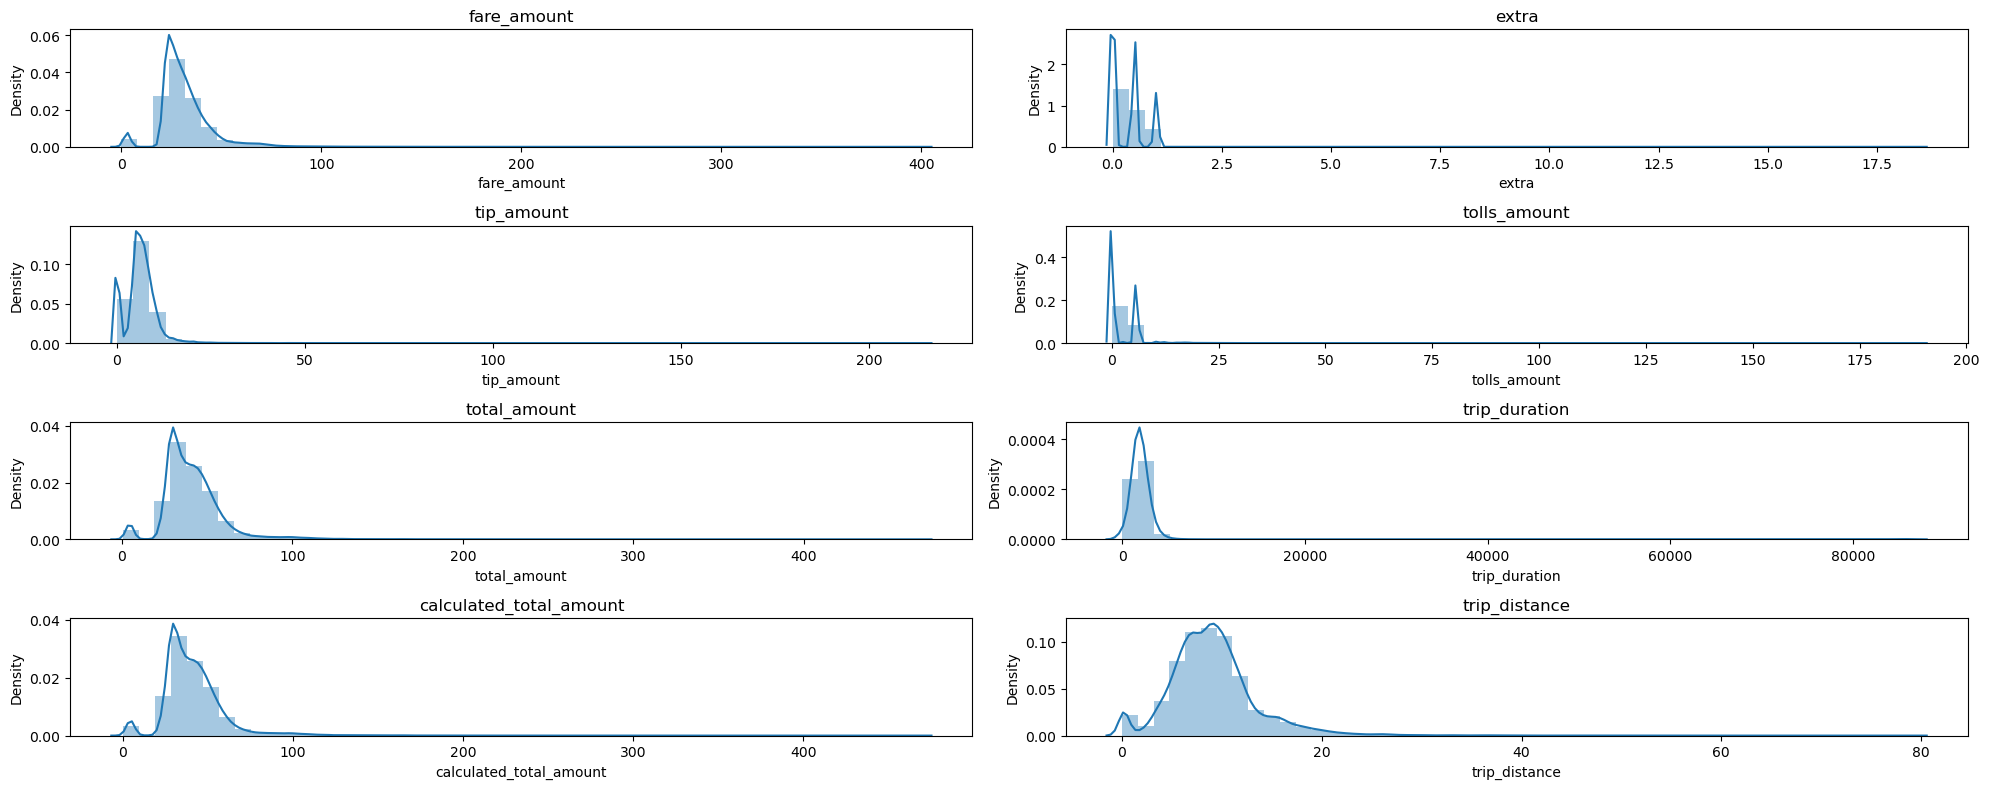

In [48]:
num_cols=['fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount','trip_duration',
       'calculated_total_amount','trip_distance']
c=1
for i in num_cols:
    plt.subplot(4,2,c)
    sns.distplot(combined[i])
    c+=1
    plt.title(i)
plt.tight_layout()
plt.show()


#All the Numerical variable are positively skewed.
    

In [49]:
combined.select_dtypes(include='O').columns

Index(['rate_code', 'store_and_fwd_flag', 'payment_type', 'mta_tax',
       'imp_surcharge'],
      dtype='object')

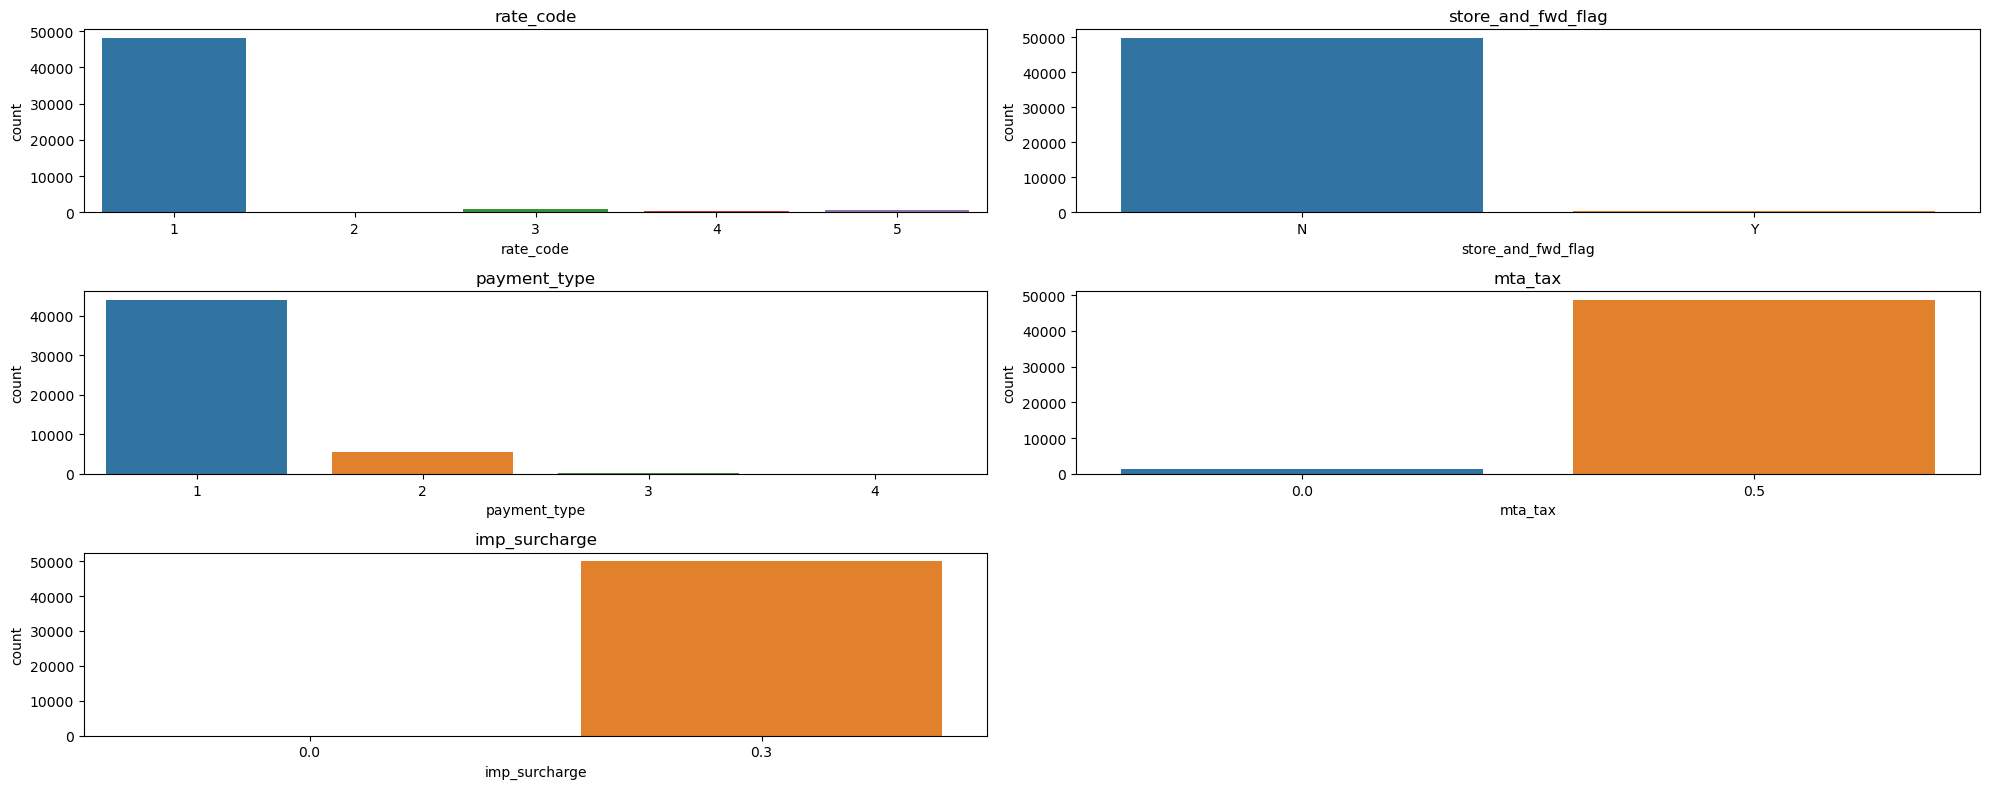

In [50]:
cat_cols=['rate_code', 'store_and_fwd_flag', 'payment_type', 'mta_tax',
       'imp_surcharge']
c=1
for i in cat_cols:
    plt.subplot(3,2,c)
    sns.countplot(combined[i])
    c+=1
    plt.title(i)
plt.tight_layout()
plt.show()

In [51]:
# Bivariate Num vs Target

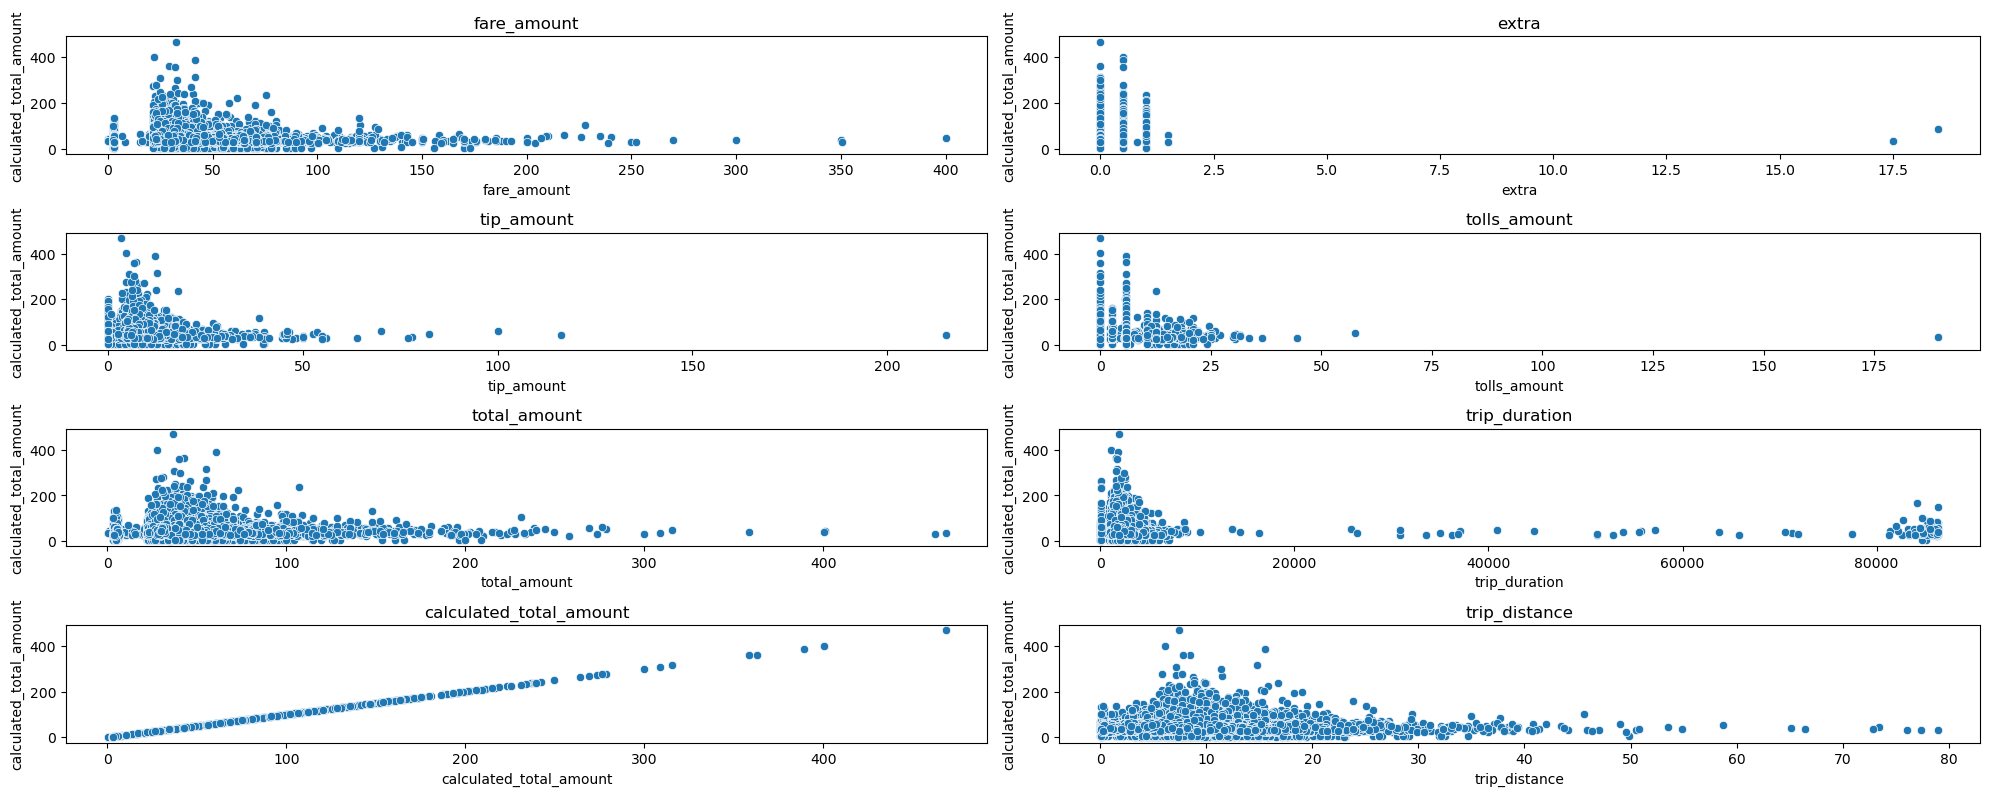

In [52]:
c=1
for i in num_cols:
    plt.subplot(4,2,c)
    sns.scatterplot(combined[i],combined['calculated_total_amount'])
    c+=1
    plt.title(i)
plt.tight_layout()
plt.show()

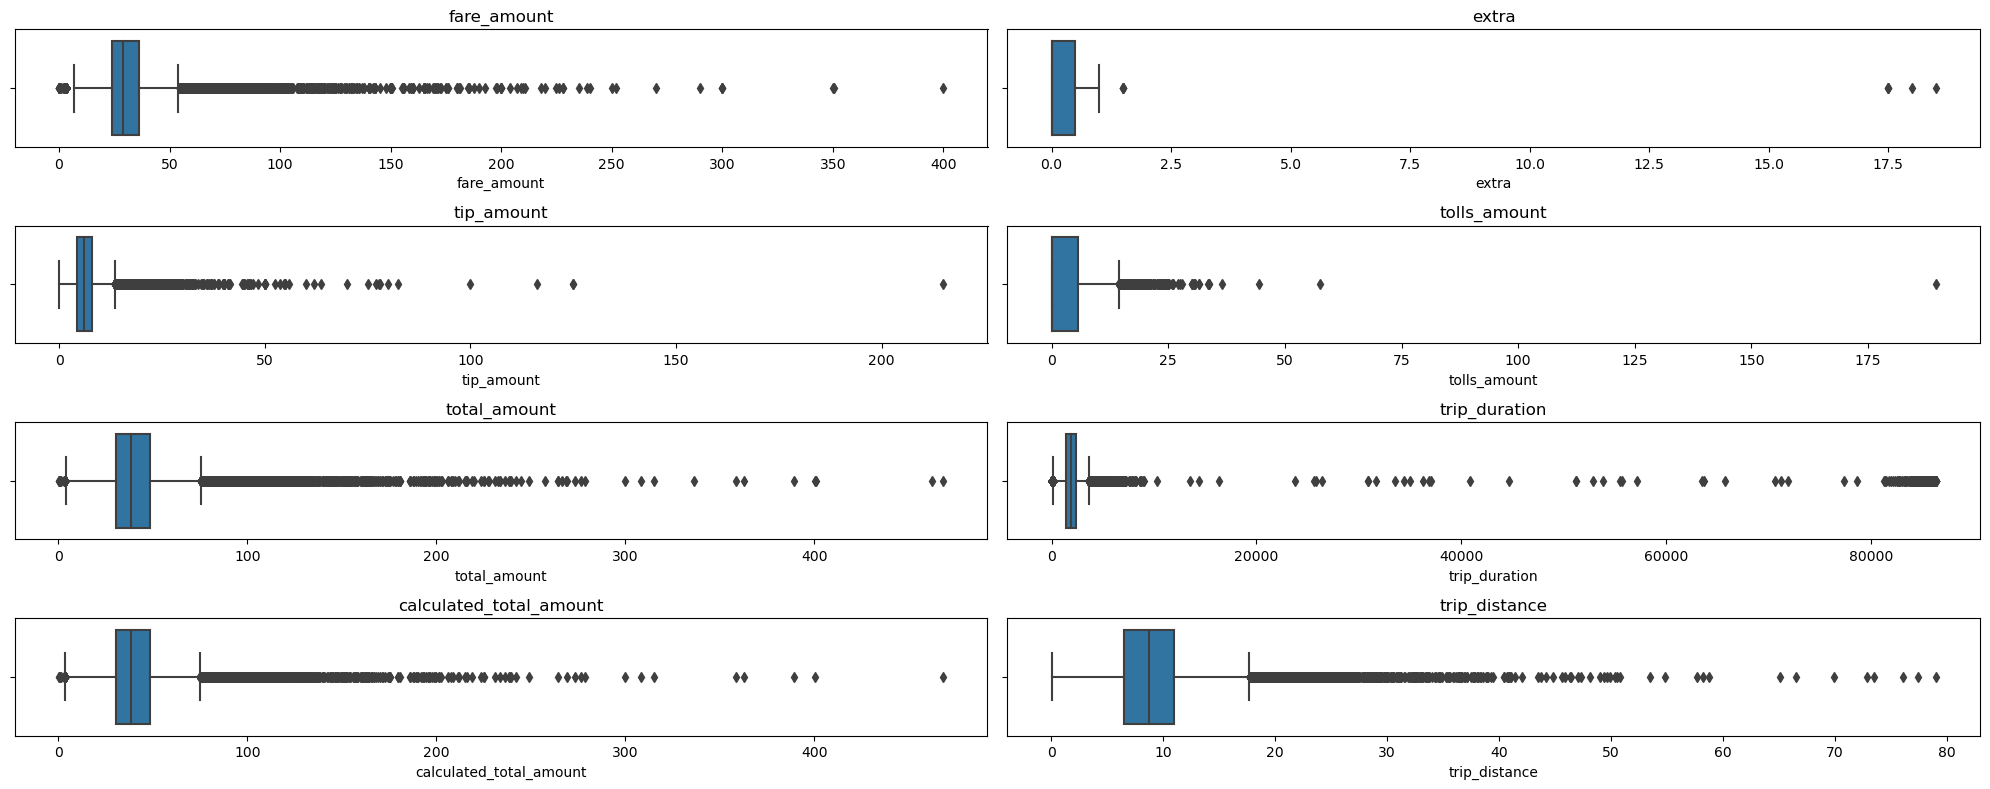

In [53]:
c=1
for i in num_cols:
    plt.subplot(4,2,c)
    sns.boxplot(combined[i])
    c+=1
    plt.title(i)
plt.tight_layout()
plt.show()

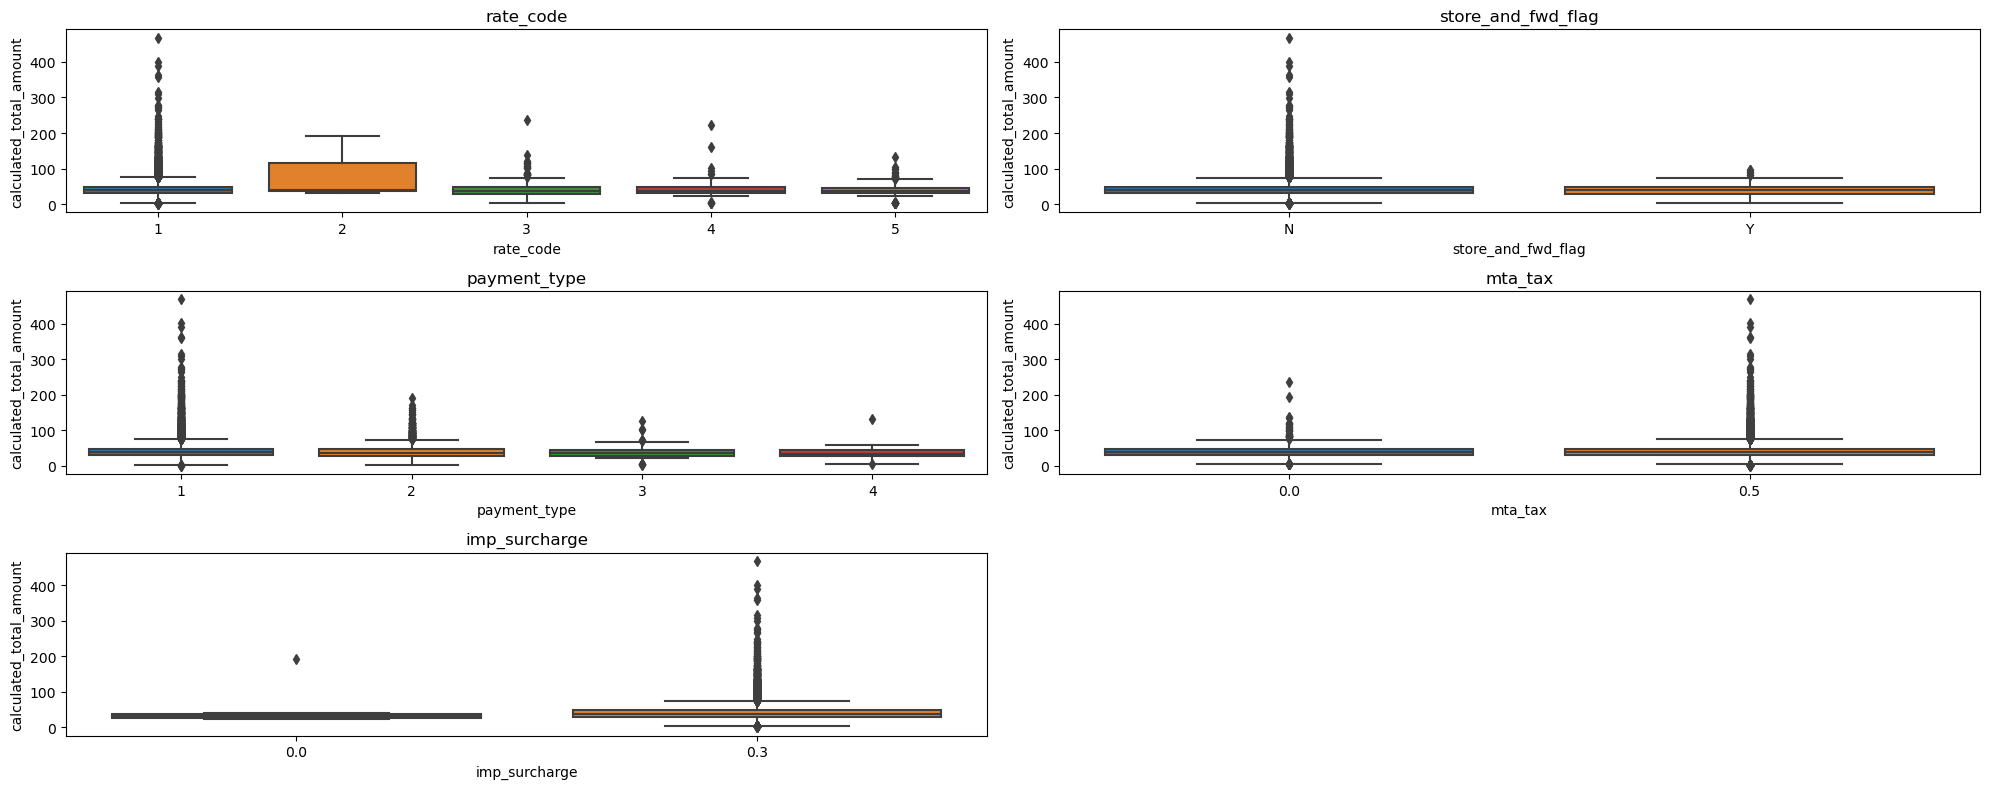

In [54]:
#Biavriate analysis CAT vs NUM

c=1
for i in cat_cols:
    plt.subplot(3,2,c)
    sns.boxplot(combined[i],combined['calculated_total_amount'])
    c+=1
    plt.title(i)
plt.tight_layout()
plt.show()

In [56]:
# Missing values

combined.isnull().sum()[combined.isnull().sum()!=0]

calculated_total_amount    15000
dtype: int64

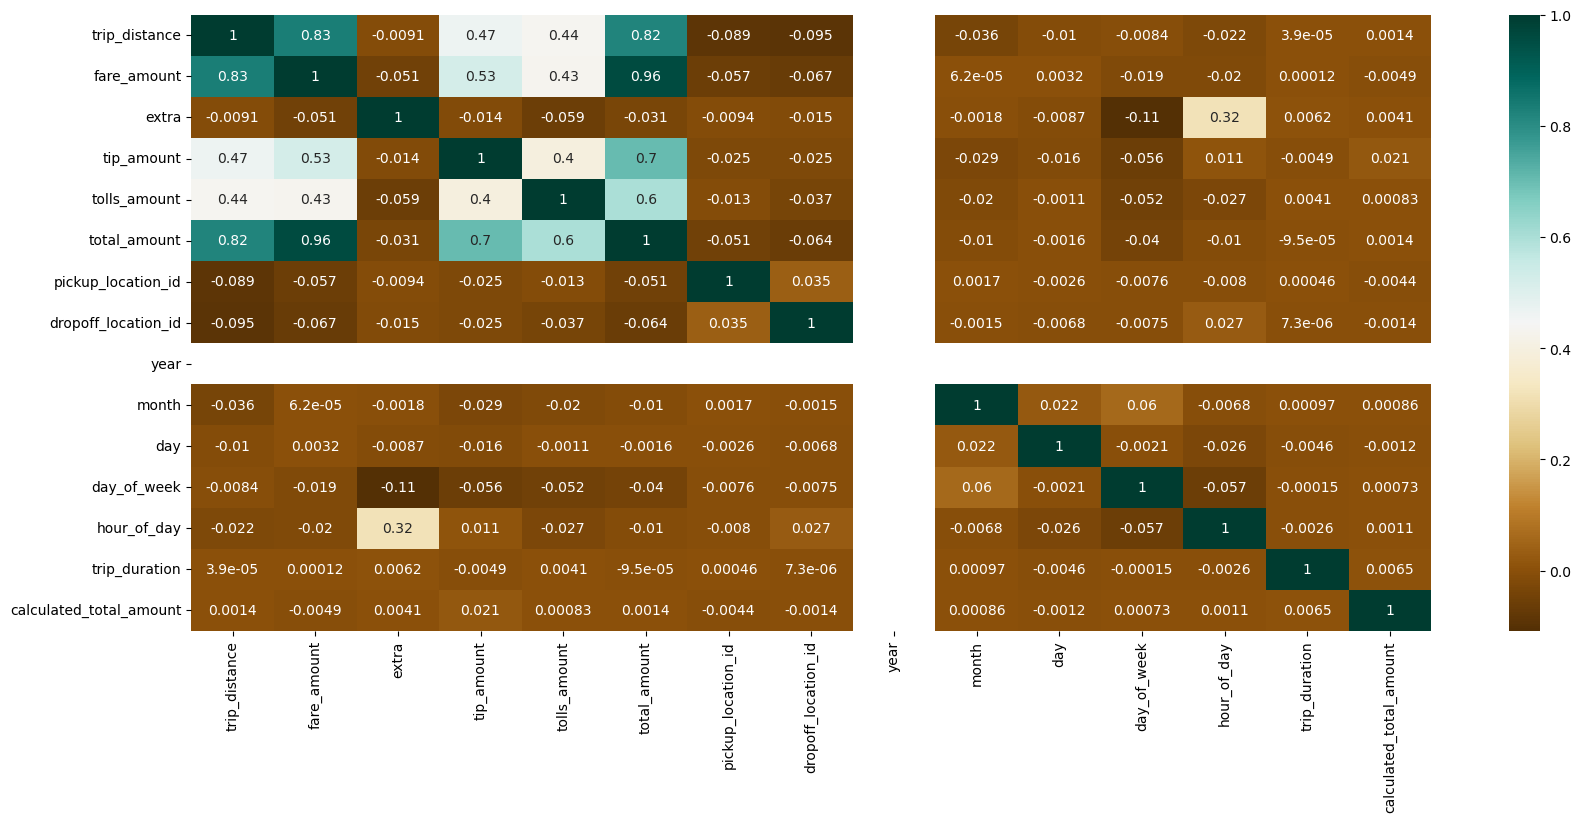

In [63]:
#Bivariate analysis

sns.heatmap(combined.corr(),annot=True,cmap='BrBG')
plt.show()

# Feature Engineering

In [64]:
combined.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount'],
      dtype='object')

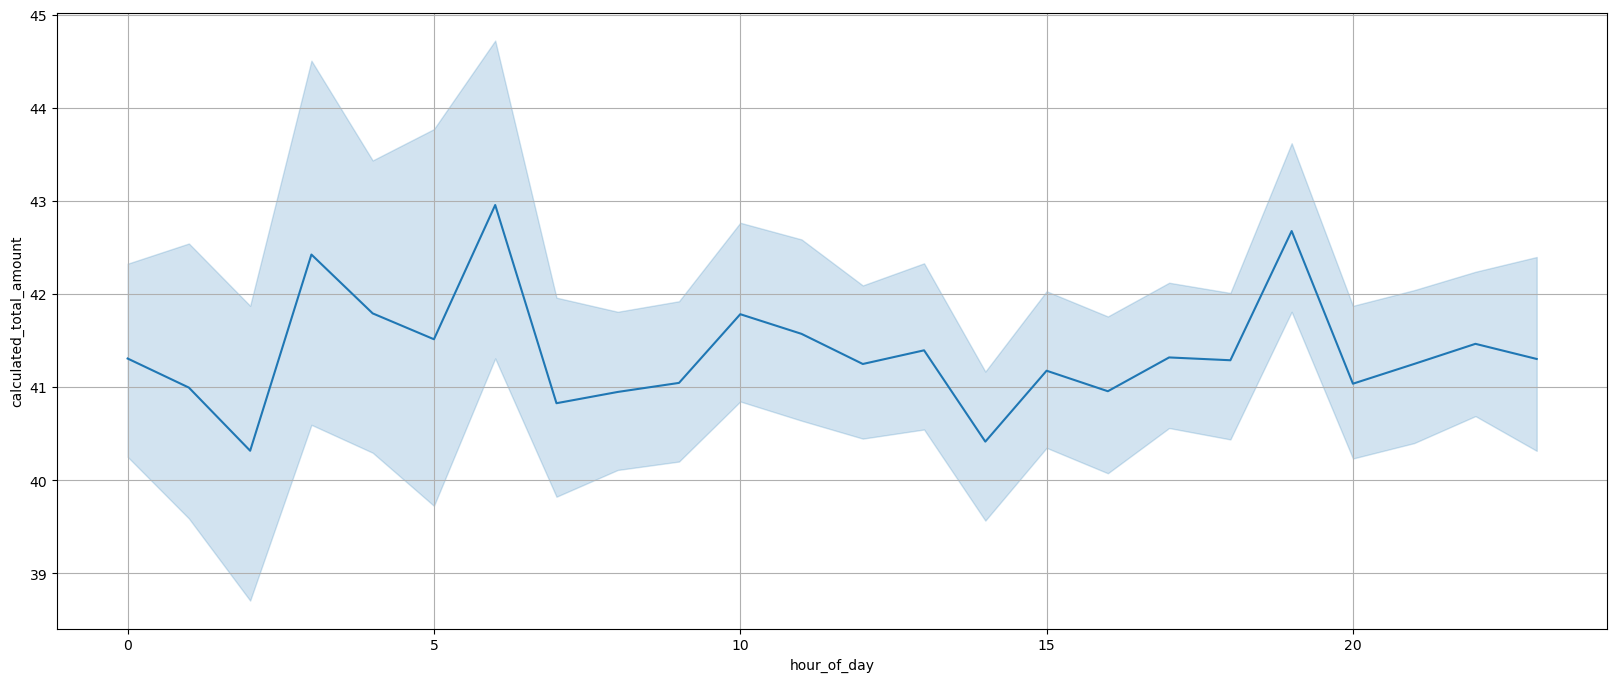

In [71]:
sns.lineplot(combined.hour_of_day,combined.calculated_total_amount)
plt.grid()
plt.show()

In [73]:
### Rush Hour

combined['rush_hour']=combined.hour_of_day.apply(lambda x :1 if x in [6,10,15,16,17,18,19,20] else 0)

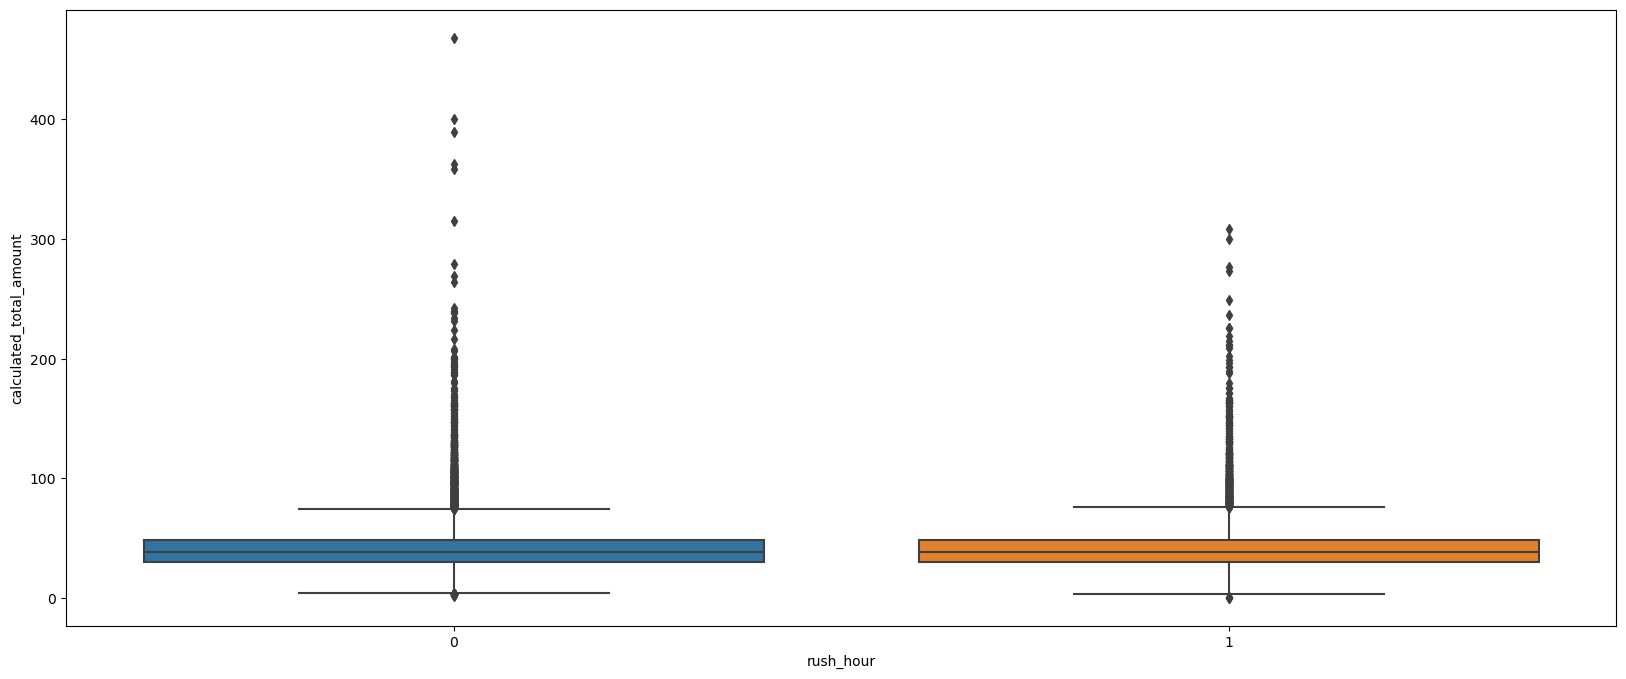

In [76]:
#Rush Hour vs Target

sns.boxplot(combined.rush_hour,combined.calculated_total_amount)
plt.show()

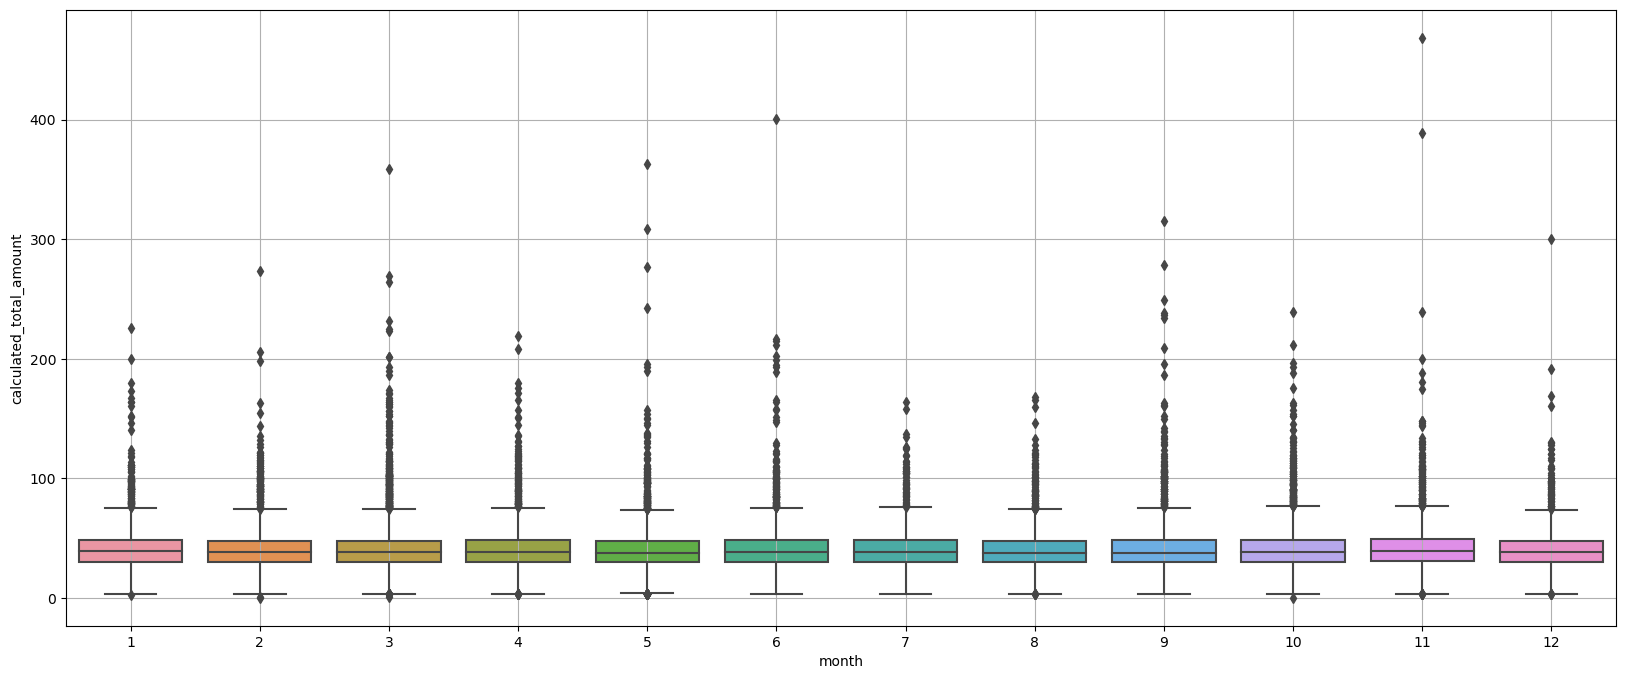

In [82]:
sns.boxplot(combined.month,combined.calculated_total_amount)
plt.grid()
plt.show()

<AxesSubplot:xlabel='day', ylabel='calculated_total_amount'>

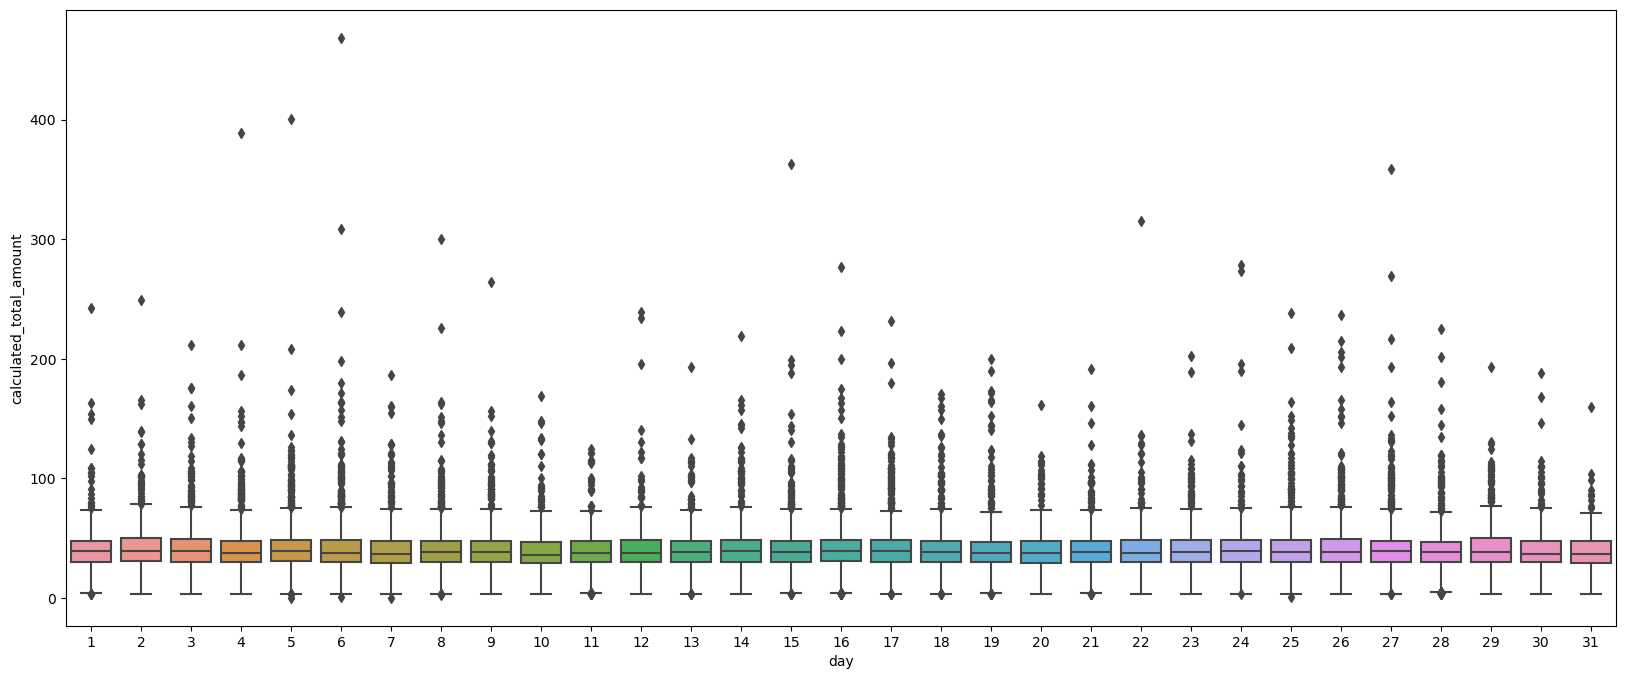

In [84]:
sns.boxplot(combined.day,combined.calculated_total_amount)

In [87]:
import yellowbrick

In [89]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [97]:
combined.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount', 'rush_hour'],
      dtype='object')

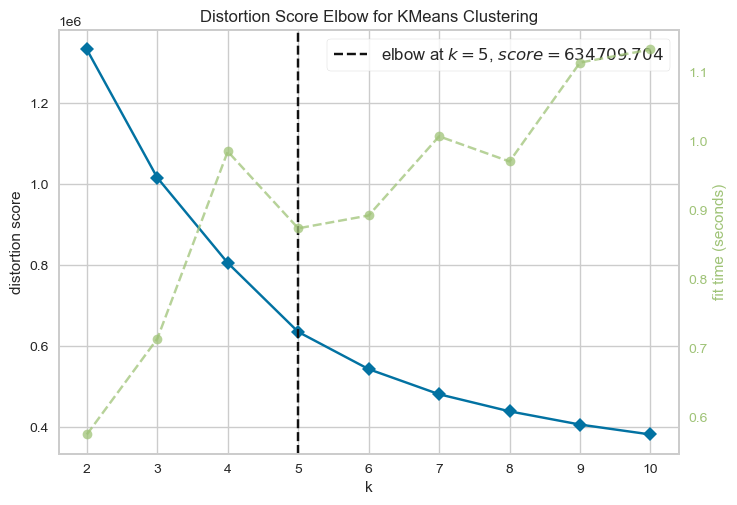

In [103]:
kmeans=KMeans()
visualizer=KElbowVisualizer(estimator=kmeans,random_state=0)
data=combined.loc[:, ['day_of_week','hour_of_day','month']]
visualizer.fit(data)
visualizer.show()
plt.show()

In [101]:
#n_cluster=5

kmeans=KMeans(n_clusters=5,random_state=0)
k=kmeans.fit(data)
combined['clusters']=k.labels_

In [106]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,rush_hour,clusters
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30,1,4
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40,1,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36,0,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30,1,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80,0,3


In [107]:
#Split the data in train and test
train.shape,test.shape

((35000, 20), (15000, 19))

In [114]:
newtrain=combined.loc[0:train.shape[0]-1, :]
newtest=combined.loc[train.shape[0]:, :]

In [116]:
newtest.shape,newtrain.shape

((15000, 22), (35000, 22))

In [117]:
#drop the target from newtest

newtest.drop('calculated_total_amount',axis=1,inplace=True)

In [119]:
newtest.shape

(15000, 21)

# Outlier Removal

In [126]:
q1=newtrain.quantile(0.25)
q3=newtrain.quantile(0.75)
iqr=q3-q1

ll = q1 - 1.5 * iqr
ul = q3 + 1.5 * iqr

wt_outliers=newtrain[~((newtrain < ll) | (newtrain > ul)).any(axis=1)]

In [129]:
wt_outliers.shape

(26105, 22)

In [133]:
wt_outliers.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount', 'rush_hour',
       'clusters'],
      dtype='object')

In [137]:
#Drop the insignificant variable

finaltrain=wt_outliers.drop(['calculated_total_amount','year','pickup_location_id','dropoff_location_id'],axis=1)

finaltest=newtest.drop(['year','pickup_location_id','dropoff_location_id'],axis=1)
finaltrain.shape,finaltest.shape

((26105, 18), (15000, 18))

In [140]:

finaltrain.select_dtypes(include=np.number).columns

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration', 'rush_hour', 'clusters'],
      dtype='object')

In [142]:
#Min Max scaler

num_cols=['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration']


from sklearn.preprocessing import MinMaxScaler


mm=MinMaxScaler()

for i in num_cols:
    finaltrain.loc[:, i]=mm.fit_transform(pd.DataFrame(finaltrain.loc[:, i]))
    finaltest.loc[:, i]=mm.fit_transform(pd.DataFrame(finaltest.loc[:, i]))

In [148]:
#Dummy

dummytrian=pd.get_dummies(finaltrain,drop_first=True)
dummytest=pd.get_dummies(finaltest,drop_first=True)

In [150]:
dummytest.shape,dummytrian.shape

((15000, 23), (26105, 22))

In [154]:
#'rate_code_2'

dummytest.drop('rate_code_2',axis=1,inplace=True)

In [156]:
dummytest.shape

(15000, 22)

### Model Building

In [157]:
y=wt_outliers.calculated_total_amount

In [161]:
#Training and validation set to build the models

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [170]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
lr=LinearRegression()
pred_train=[]
pred_test=[]

rmse_train = []
rmse_test  = []

for train_index,test_index in kfold.split(dummytrian,y):
    #print(train_index,test_index)
    xtrain=dummytrian.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrian.iloc[test_index]  #validation set
    ytest=y.iloc[test_index]           #Validation set
    pred_train=lr.fit(xtrain, ytrain).predict(xtrain)
    pred_test=lr.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print(np.mean(rmse_train))
print(np.mean(rmse_test))
    

12.36551935198674
12.376492810045997


In [171]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
pred_train=[]
pred_test=[]

rmse_train = []
rmse_test  = []

for train_index,test_index in kfold.split(dummytrian,y):
    #print(train_index,test_index)
    xtrain=dummytrian.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrian.iloc[test_index]  #validation set
    ytest=y.iloc[test_index]           #Validation set
    pred_train=dt.fit(xtrain, ytrain).predict(xtrain)
    pred_test=dt.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print(np.mean(rmse_train))
print(np.mean(rmse_test))

2.1690632409661163e-17
18.137181072417057


In [174]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
pred_train=[]
pred_test=[]

rmse_train = []
rmse_test  = []

for train_index,test_index in kfold.split(dummytrian,y):
    #print(train_index,test_index)
    xtrain=dummytrian.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrian.iloc[test_index]  #validation set
    ytest=y.iloc[test_index]           #Validation set
    pred_train=xgb.fit(xtrain, ytrain).predict(xtrain)
    pred_test=xgb.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print(np.mean(rmse_train))
print(np.mean(rmse_test))

10.028084396358583
12.808312825916971


In [175]:
from sklearn.linear_model import Lasso

ridge=Ridge(alpha=1)
pred_train=[]
pred_test=[]

rmse_train = []
rmse_test  = []

for train_index,test_index in kfold.split(dummytrian,y):
    #print(train_index,test_index)
    xtrain=dummytrian.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrian.iloc[test_index]  #validation set
    ytest=y.iloc[test_index]           #Validation set
    pred_train=ridge.fit(xtrain, ytrain).predict(xtrain)
    pred_test=ridge.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.365651409180904
12.375639479509038


In [179]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=0.5)
pred_train=[]
pred_test=[]

rmse_train = []
rmse_test  = []

for train_index,test_index in kfold.split(dummytrian,y):
    #print(train_index,test_index)
    xtrain=dummytrian.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrian.iloc[test_index]  #validation set
    ytest=y.iloc[test_index]           #Validation set
    pred_train=lasso.fit(xtrain, ytrain).predict(xtrain)
    pred_test=lasso.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.392158144315555
12.391967385912054


In [180]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

rf=RandomForestRegressor()

pred_train=[]
pred_test=[]

rmse_train = []
rmse_test  = []

for train_index,test_index in kfold.split(dummytrian,y):
    #print(train_index,test_index)
    xtrain=dummytrian.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrian.iloc[test_index]  #validation set
    ytest=y.iloc[test_index]           #Validation set
    pred_train=rf.fit(xtrain, ytrain).predict(xtrain)
    pred_test=rf.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print(np.mean(rmse_train))
print(np.mean(rmse_test))

4.728740025241476
12.625936910333943


In [181]:
ada=AdaBoostRegressor()

pred_train=[]
pred_test=[]

rmse_train = []
rmse_test  = []

for train_index,test_index in kfold.split(dummytrian,y):
    #print(train_index,test_index)
    xtrain=dummytrian.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrian.iloc[test_index]  #validation set
    ytest=y.iloc[test_index]           #Validation set
    pred_train=ada.fit(xtrain, ytrain).predict(xtrain)
    pred_test=ada.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.360461942931806
12.383545223376556


In [182]:
gb=GradientBoostingRegressor()

pred_train=[]
pred_test=[]

rmse_train = []
rmse_test  = []

for train_index,test_index in kfold.split(dummytrian,y):
    #print(train_index,test_index)
    xtrain=dummytrian.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrian.iloc[test_index]  #validation set
    ytest=y.iloc[test_index]           #Validation set
    pred_train=gb.fit(xtrain, ytrain).predict(xtrain)
    pred_test=gb.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.200447831959028
12.38398637327881


In [183]:
from lightgbm import LGBMRegressor

In [184]:
lgm=LGBMRegressor()

pred_train=[]
pred_test=[]

rmse_train = []
rmse_test  = []

for train_index,test_index in kfold.split(dummytrian,y):
    #print(train_index,test_index)
    xtrain=dummytrian.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrian.iloc[test_index]  #validation set
    ytest=y.iloc[test_index]           #Validation set
    pred_train=lgm.fit(xtrain, ytrain).predict(xtrain)
    pred_test=lgm.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print(np.mean(rmse_train))
print(np.mean(rmse_test))


11.549946969135831
12.447423652558982


In [185]:
#XGB Boosting with paramter

xgb=XGBRegressor(max_depth=2,n_estimators=49,reg_lambda=1.6)

pred_train=[]
pred_test=[]

rmse_train = []
rmse_test  = []

for train_index,test_index in kfold.split(dummytrian,y):
    #print(train_index,test_index)
    xtrain=dummytrian.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrian.iloc[test_index]  #validation set
    ytest=y.iloc[test_index]           #Validation set
    pred_train=xgb.fit(xtrain, ytrain).predict(xtrain)
    pred_test=xgb.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print(np.mean(rmse_train))
print(np.mean(rmse_test))


12.27149670428059
12.383288679798659


In [188]:
rf=RandomForestRegressor(n_estimators=500,min_samples_leaf=4,random_state=0)
pred_train=[]
pred_test=[]

rmse_train = []
rmse_test  = []

for train_index,test_index in kfold.split(dummytrian,y):
    #print(train_index,test_index)
    xtrain=dummytrian.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrian.iloc[test_index]  #validation set
    ytest=y.iloc[test_index]           #Validation set
    pred_train=rf.fit(xtrain, ytrain).predict(xtrain)
    pred_test=rf.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
print(np.mean(rmse_train))
print(np.mean(rmse_test))

7.834335752808966
12.504883281288372


In [189]:
rf=RandomForestRegressor(n_estimators=500,min_samples_leaf=4,random_state=0)
pred=[]

for train_index,test_index in kfold.split(dummytrian,y):
    #print(train_index,test_index)
    xtrain=dummytrian.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(dummytest))

In [215]:
finalpred=pd.DataFrame(pred).T.mean(axis=1)
sub=pd.DataFrame({'calculated_total_amount':finalpred})
sub.to_csv('rf_taxi0.csv',index=False) 

In [194]:
cd

C:\Users\hp


# Stacking Model

In [199]:
from sklearn.ensemble import StackingRegressor

In [224]:
base= [('lr',lr),('gb',gb),('xgb',xgb),('lgm',lgm)]
final=RandomForestRegressor(n_estimators=500,min_samples_leaf=4,random_state=0)

stack=StackingRegressor(estimators=base,final_estimator=final,cv=5)

pred=stack.fit(dummytrian,y).predict(dummytest)
sub=pd.DataFrame({'calculated_total_amount':pred})
sub.to_csv('Stack Regressor.csv',index=False)   #19.76

In [223]:
pred

array([37.44014817, 42.55827555, 41.69529639, ..., 42.45997511,
       36.81155893, 38.40871269])

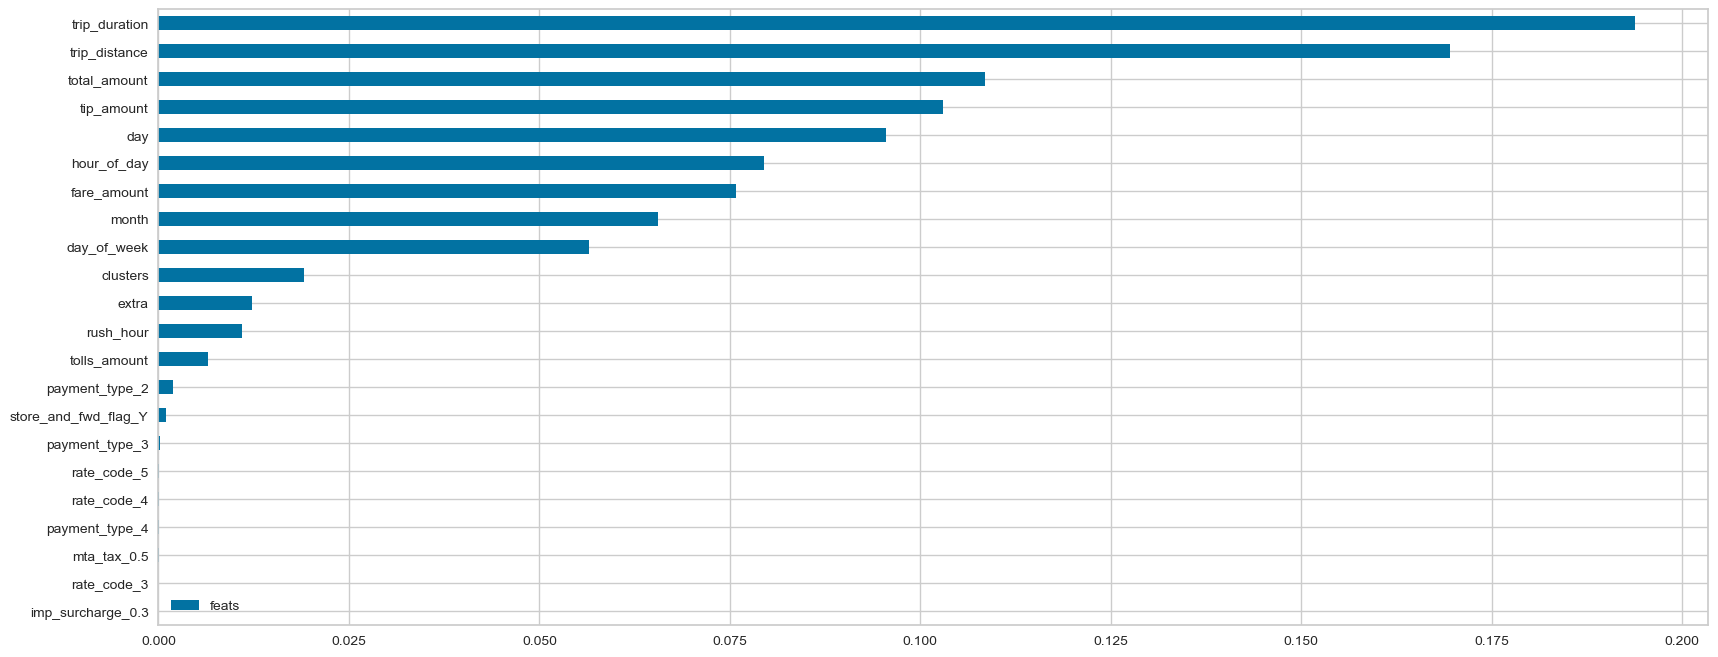

In [229]:
pd.DataFrame(rf.feature_importances_,index=dummytest.columns,
            columns=['feats']).sort_values(by='feats').plot(kind='barh')
plt.show()